In [1]:
# why to use random forest ?
# decsion tree splits the data to the depth so it has overftting issue - low bias high variance  
# if we want to convert high variance to low variiace we can use random forest algo 

# done using row sampling and feature sampling 
# giving sample data points to base learner which is nothing but decision tree

import pandas as pd 
from sklearn.datasets import load_digits
digit=load_digits()

In [5]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [11]:
df=pd.DataFrame(digit.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [15]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [29]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
# adding this target column in our data
df['target']=digit.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [37]:
x=df.drop('target',axis='columns')
y=df.target

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [45]:
len(x_train)

1437

In [47]:
len(y_test)

360

In [ ]:
# ensemble -it is used when u are using multiple algorithm agorithm to predict the outcome 

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50) # estimators it wil use 50 random trees
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [71]:
model.score(x_test,y_test)

0.9777777777777777

In [79]:
ypredicted=model.predict(x_test)
ypredicted

array([4, 7, 5, 9, 7, 5, 4, 4, 1, 2, 8, 8, 7, 5, 1, 7, 1, 0, 4, 4, 4, 7,
       2, 2, 3, 3, 0, 2, 6, 7, 6, 6, 9, 7, 7, 0, 6, 6, 5, 8, 0, 7, 4, 6,
       4, 0, 5, 5, 4, 5, 7, 7, 7, 6, 9, 2, 3, 9, 0, 4, 8, 7, 0, 9, 9, 0,
       3, 3, 3, 6, 9, 4, 6, 1, 2, 1, 7, 4, 9, 6, 7, 8, 6, 6, 4, 2, 8, 1,
       8, 9, 5, 4, 6, 0, 1, 8, 0, 8, 7, 9, 8, 7, 6, 2, 5, 1, 0, 7, 5, 3,
       7, 2, 5, 5, 5, 2, 6, 5, 9, 8, 7, 3, 0, 1, 9, 0, 5, 9, 7, 5, 0, 2,
       6, 7, 9, 9, 3, 1, 4, 6, 9, 3, 9, 5, 0, 3, 2, 0, 8, 2, 6, 4, 7, 1,
       6, 7, 7, 7, 8, 5, 2, 2, 0, 8, 1, 8, 7, 4, 9, 1, 6, 2, 7, 6, 5, 7,
       7, 4, 0, 7, 9, 3, 6, 3, 9, 0, 6, 9, 8, 1, 4, 4, 5, 3, 4, 0, 6, 7,
       4, 0, 8, 3, 5, 8, 8, 2, 6, 4, 0, 9, 6, 8, 0, 5, 2, 4, 6, 9, 2, 7,
       8, 4, 1, 8, 5, 0, 2, 9, 9, 2, 9, 1, 1, 2, 1, 9, 8, 0, 7, 6, 2, 5,
       7, 5, 3, 8, 1, 9, 8, 1, 4, 5, 5, 2, 2, 3, 0, 9, 3, 8, 0, 4, 2, 2,
       4, 6, 5, 1, 4, 0, 1, 3, 1, 5, 9, 0, 9, 3, 7, 6, 0, 7, 3, 1, 6, 5,
       6, 7, 4, 6, 6, 7, 2, 6, 8, 5, 4, 8, 4, 3, 9,

# Confusion Matrix



In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypredicted)     # original ,predicted
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 26,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 35]], dtype=int64)

In [ ]:
# Confusion matrix compares predicted values against actual values

Text(50.722222222222214, 0.5, 'Truth')

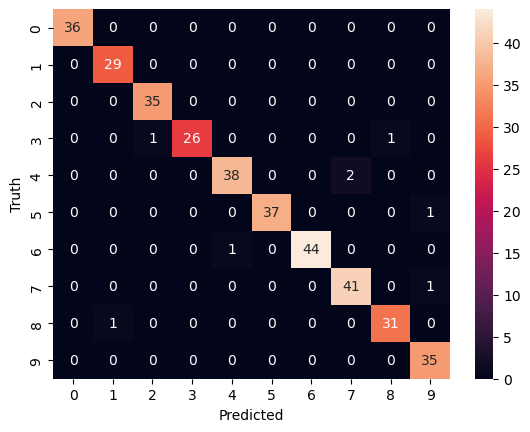

In [95]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')